In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# actual file path
df = pd.read_excel('fund_stats_all.xlsx')

In [3]:
# Check for missing values
if df.isnull().values.any():
    df = df.dropna()  # Drop rows with missing values

In [4]:
# Extract the numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in [int, float]]

# Check for large values
max_value = np.abs(df[numerical_cols].values).max()
if np.isnan(max_value) or max_value > 1e10:
    raise ValueError("Data contains values that are too large.")

# Save the 'Instrument' column
instrument_column = df['Instrument']

# Scale the numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [5]:
# Specify the number of components you want to retain
n_components = 10

# Initialize PCA
pca = PCA(n_components=n_components)

# Perform PCA
principal_components = pca.fit_transform(df[numerical_cols])

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Add the Instrument column to the PCA DataFrame
pca_df['Instrument'] = df['Instrument']


In [6]:
print(pca_df)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.677165  0.363159  2.436361  0.280309 -0.057035 -0.018985  2.172816   
1    0.900391 -0.302610  3.129091  1.298929 -0.293452  0.172467  2.318404   
2    0.587078  0.613225  2.178035 -0.090051  0.059944 -0.051181  2.123894   
3    5.390817 -1.499948 -0.788333  1.385763 -0.938315 -0.027342  0.305578   
4    5.111189 -0.640342 -1.612686  0.854373 -0.913799  0.300141  0.232043   
..        ...       ...       ...       ...       ...       ...       ...   
157 -0.677491 -3.410879 -3.507898  2.841232  4.643386  1.181583  1.385062   
158  0.331384  1.178227  2.286689 -0.877918  1.210835 -0.865777 -0.718039   
159 -2.203056  1.558804 -0.039335 -1.475589  0.297218 -1.068334 -1.110024   
160 -2.255578  2.787182 -0.682459 -0.407960  0.457226 -1.206758 -1.519702   
161 -1.475305  1.293502  0.365782 -0.585383  1.313649  0.242115 -0.675149   

          PC8       PC9      PC10 Instrument  
0   -0.688621  0.050317  0.5

Calculating the similarity between funds based on the principal components and grouping together similar funds. The code snippet calculates cosine similarity between funds using the principal components

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix based on the principal components
similarity_matrix = cosine_similarity(pca_df.iloc[:, :-1])

# Create a DataFrame to store the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=pca_df['Instrument'], columns=pca_df['Instrument'])

# Print the similarity matrix
print(similarity_df)

Instrument   SSIAX.O   SESLX.O   LMRNX.O   ACASX.O   ACCSX.O       NaN  \
Instrument                                                               
SSIAX.O     1.000000  0.896885  0.981225  0.137202  0.061349 -0.086252   
SESLX.O     0.896885  1.000000  0.795213  0.189585  0.042975 -0.135718   
LMRNX.O     0.981225  0.795213  1.000000  0.098505  0.058887 -0.057858   
ACASX.O     0.137202  0.189585  0.098505  1.000000  0.967101  0.045291   
ACCSX.O     0.061349  0.042975  0.058887  0.967101  1.000000  0.156606   
...              ...       ...       ...       ...       ...       ...   
TSBPX.O    -0.246495 -0.162664 -0.263193  0.117844  0.097397 -0.062682   
TSBRX.O     0.333891  0.283346  0.339334 -0.275691 -0.320955 -0.319166   
TSBBX.O    -0.367964 -0.404098 -0.323788 -0.819494 -0.759675 -0.086674   
TISCX.O    -0.410109 -0.461106 -0.356769 -0.698580 -0.610165  0.257470   
TRPSX.O    -0.231196 -0.244023 -0.197206 -0.786513 -0.757840  0.036799   

Instrument   AMIDX.O   AMDWX.O   AMIG

In [8]:
# Group similar funds
grouped_funds = {}
for i, instrument in enumerate(pca_df['Instrument']):
    if instrument not in grouped_funds:
        grouped_funds[instrument] = []
    grouped_funds[instrument].extend(
        [pca_df['Instrument'][j] for j, similarity in enumerate(similarity_matrix[i]) if similarity >= 0.9 and j != i]
    )

# Print the grouped funds
for instrument, similar_funds in grouped_funds.items():
    print(f"Similar funds for {instrument}:")
    print(similar_funds)
    print()


Similar funds for SSIAX.O:
['LMRNX.O']

Similar funds for SESLX.O:
[nan]

Similar funds for LMRNX.O:
['SSIAX.O', 'REDWX.O', 'CSIFX.O']

Similar funds for ACASX.O:
['ACCSX.O', 'DOMOX.O', 'PRFIX.O']

Similar funds for ACCSX.O:
['ACASX.O', 'DOMIX.O', 'PRFIX.O', 'PARMX.O']

Similar funds for nan:
['AMIDX.O', 'SESLX.O', 'DSFRX.O', 'CSVIX.O', 'SRIFX.O', 'PXHIX.O', 'PXHAX.O', 'CULAX.O', 'PLDIX.O', 'DOMOX.O', 'NBSLX.O', 'PRFIX.O', 'PARMX.O', 'PXSIX.O', 'PXSAX.O', 'PTSAX.O', 'MPLIX.O', 'MMSIX.O', 'MMSCX.O', 'MVIIX.O', 'MVIAX.O', 'SEBFX.O', 'SEEFX.O']

Similar funds for AMIDX.O:
[nan]

Similar funds for AMDWX.O:
['AMIGX.O', 'CVMCX.O', 'CSIEX.O']

Similar funds for AMIGX.O:
['AMDWX.O', 'CVMCX.O', 'CSIEX.O']

Similar funds for AMAGX.O:
['AMINX.O']

Similar funds for AMINX.O:
['AMAGX.O']

Similar funds for AMANX.O:
[]

Similar funds for REDWX.O:
['LMRNX.O', 'CSIFX.O']

Similar funds for CSIFX.O:
['LMRNX.O', 'REDWX.O']

Similar funds for CSGCX.O:
['CSIBX.O', 'CHBCX.O', 'CFICX.O']

Similar funds for 

Outliers can represent funds with unique or extreme performance characteristics compared to the rest of the dataset. They might be worth further investigation to understand the factors driving their distinctive performance. To identify funds that stand out as outliers in the principal component space, we calculate the distance or deviation of each fund from the centroid of the principal components. The code snippet below identifies outliers using the Mahalanobis distance:

In [9]:
from scipy.spatial.distance import mahalanobis

# Calculate the centroid of the principal components
centroid = pca_df.iloc[:, :-1].mean()

# Calculate the Mahalanobis distance for each fund from the centroid
pca_df['Mahalanobis_Distance'] = pca_df.iloc[:, :-1].apply(lambda row: mahalanobis(row, centroid, np.linalg.inv(pca_df.iloc[:, :-1].cov())), axis=1)

# Sort the funds by the Mahalanobis distance in descending order
outliers = pca_df.sort_values('Mahalanobis_Distance', ascending=False)

# Print the top outliers
print(outliers.head())


          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
157 -0.677491 -3.410879 -3.507898  2.841232  4.643386  1.181583  1.385062   
59   5.164441 -4.256455  3.856562 -0.397718 -1.219798 -2.421256 -0.184744   
33  -4.391045  5.536579 -1.180060  2.610289 -0.375260 -1.796871 -1.854017   
31  -4.316587  5.344883 -0.949702  2.964633 -0.498453 -1.716471 -1.789464   
32  -4.155933  4.770036 -0.285411  3.978899 -0.808511 -1.477364 -1.662644   

          PC8       PC9      PC10 Instrument  Mahalanobis_Distance  
157  0.480501 -0.135011  0.877278    TSBPX.O              5.993485  
59   2.811237  0.703686  0.921928    CMACX.O              5.954574  
33   1.840978  0.756114  1.737689    CGAEX.O              5.833183  
31   1.973480  0.615574  1.363371    CUBCX.O              5.633787  
32   2.399428  0.262839  0.174905    CUBIX.O              5.595809  


Visualize the Principal Components: Creating scatter plots to explore the relationship between the principal components. For example, below we have plotted PC5 against PC9 to see how funds cluster or diverge based on their performance characteristics. Visualizations can help identify groups of similar funds or potential outliers.

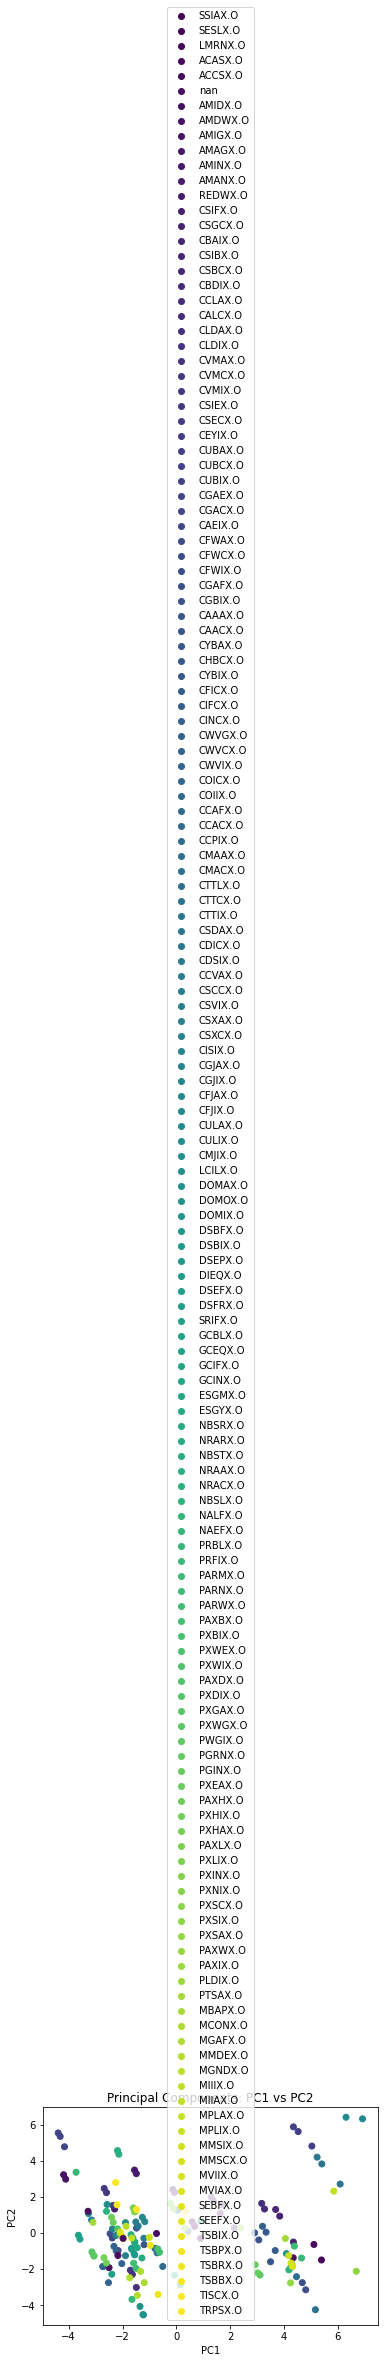

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get the unique instruments
instruments = pca_df['Instrument'].unique()

# Generate a colormap with the number of unique instruments
colors = plt.cm.get_cmap('viridis', len(instruments))

# Create a dictionary to map instruments to colors
color_map = dict(zip(instruments, colors(range(len(instruments)))))

# Assign colors based on the 'Instrument' column
pca_df['Color'] = pca_df['Instrument'].map(color_map)

# Plot PC1 against PC2 with color-coded instruments
plt.scatter(pca_df['PC1'], pca_df['PC2'], color=pca_df['Color'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components: PC1 vs PC2')

# Add legend
for instrument, color in color_map.items():
    plt.scatter([], [], color=color, label=instrument)
plt.legend()

plt.show()



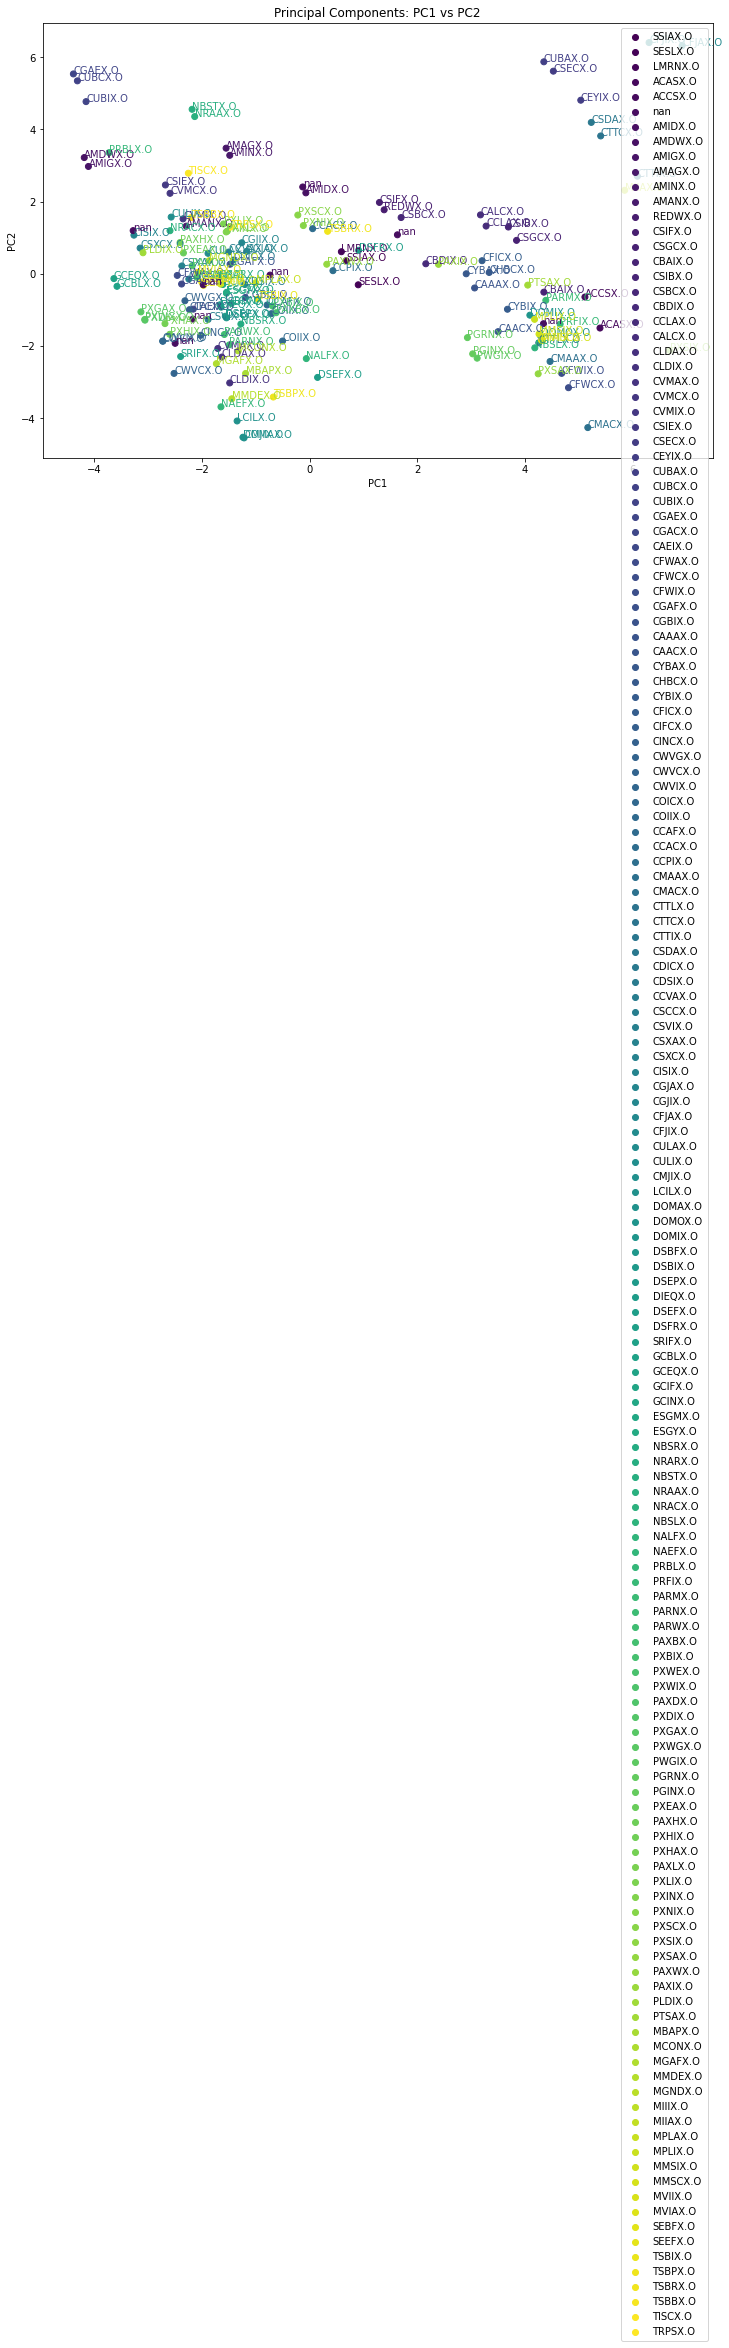

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = [12, 8]  # Adjust the values as desired
import numpy as np

# Get the unique instruments
instruments = pca_df['Instrument'].unique()

# Generate a colormap with the number of unique instruments
colors = plt.cm.get_cmap('viridis', len(instruments))

# Create a dictionary to map instruments to colors
color_map = dict(zip(instruments, colors(range(len(instruments)))))

# Assign colors based on the 'Instrument' column
pca_df['Color'] = pca_df['Instrument'].map(color_map)

# Plot PC1 against PC2 with color-coded instruments
plt.scatter(pca_df['PC1'], pca_df['PC2'], color=pca_df['Color'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components: PC1 vs PC2')

# Add legend
for instrument, color in color_map.items():
    plt.scatter([], [], color=color, label=instrument)
plt.legend()

# Add labels to each point
for i, row in pca_df.iterrows():
    plt.text(row['PC1'], row['PC2'], row['Instrument'], color=row['Color'])

plt.show()


In [16]:
from sklearn.cluster import KMeans

# Prepare the data for clustering and feature importance analysis
data = df[numerical_cols]#df.iloc[:, 1:]  # Exclude the 'Instrument' column

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as desired
kmeans.fit(data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Compute the centroid values for each cluster
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)

# Calculate the feature importance as the difference between each feature value and its cluster centroid value
feature_importances = abs(data - cluster_centroids.iloc[cluster_labels].values).mean()

# Create a DataFrame to store feature importance values
importance_df = pd.DataFrame({'Feature': data.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the top contributing factors
top_contributing_factors = importance_df.head(5)['Feature']  # Adjust the number as desired
print("Top Contributing Factors:")
print(top_contributing_factors)


Top Contributing Factors:
Unnamed: 0                                                                              Unnamed: 0
Total Expense Ratio                                                            Total Expense Ratio
1 Year Performance to Last Month End                          1 Year Performance to Last Month End
Information Ratio for 1 Year to Last Month End      Information Ratio for 1 Year to Last Month End
Information Ratio for 5 Years to Last Month End    Information Ratio for 5 Years to Last Month End
Name: Feature, dtype: object


In [17]:
print(importance_df)

                                                                                           Feature  \
Unnamed: 0                                                                              Unnamed: 0   
Total Expense Ratio                                                            Total Expense Ratio   
1 Year Performance to Last Month End                          1 Year Performance to Last Month End   
Information Ratio for 1 Year to Last Month End      Information Ratio for 1 Year to Last Month End   
Information Ratio for 5 Years to Last Month End    Information Ratio for 5 Years to Last Month End   
Sharpe Ratio for 5 Years to Last Month End              Sharpe Ratio for 5 Years to Last Month End   
Alpha for 5 Years to Last Month End                            Alpha for 5 Years to Last Month End   
Alpha for 1 Year to Last Month End                              Alpha for 1 Year to Last Month End   
Alpha for 3 Years to Last Month End                            Alpha for 3 Years t

In [18]:
print(data)

     Unnamed: 0  1 Year Performance to Last Month End  \
0     -1.723053                             -0.335893   
1     -1.702533                             -0.587087   
2     -1.682013                             -0.263167   
3     -1.661493                             -0.946840   
4     -1.640973                             -0.832547   
..          ...                                   ...   
165    1.662760                             -5.565091   
166    1.683280                              0.765399   
167    1.703800                              1.210897   
168    1.724320                              1.125675   
169    1.744840                              0.159341   

     3 Year Performance to Last Month End  \
0                               -0.202492   
1                               -0.325914   
2                               -0.156293   
3                               -1.803094   
4                               -1.753608   
..                                    ...   
